# Using List

In [1]:
import gc
import random
gc.enable()

In [2]:
def game(n, first = 0):
    """
    input: n is the number of the rounds of the game.
           first = 0 if Paul goes first, else 1 (Carole goes first)
    """
    
    # determine who plays the last turn
    
    if (n+first)%2 == 0: # Carole
        t = -1 
    else: #Paul
        t = 1 
    #build a list of 2^n elements with the ramdonly assinged values
    level_lst = [random.uniform(-1,1) for i in range(2**n)]
#     print(level_lst)
    
    while len(level_lst)!=1:
        new_lst = []
        if t == 1: # maxmize value
            for i in range(len(level_lst)//2):
                new_lst.append(max(level_lst[2*i],level_lst[2*i+1]))
            level_lst = new_lst
        else: # minimize value
            for i in range(len(level_lst)//2):
                new_lst.append(min(level_lst[2*i],level_lst[2*i+1]))
            level_lst = new_lst
        t*=-1
#         print(level_lst)
        gc.collect()
    return level_lst[0]
                

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 

# Results

## Plot for n$\in[1,20]$, Paul plays first

In [4]:
n = np.arange(1,21,1)


In [5]:
# for each n, we run game(n) for 5 times and calculate the mean to minimize the randomness
result = np.array([sum([game(i) for j in range(5)])/5 for i in range(1,21)])


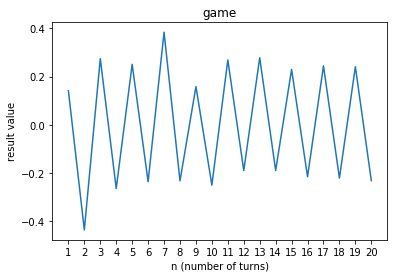

In [6]:
plt.plot(n,result)
plt.xlabel("n (number of turns)")
plt.ylabel("result value")
plt.title("game")
plt.xlim(0, 21)
plt.xticks(n)
plt.show()

## plot for odd n, Paul plays first

In [7]:
n_odd = np.arange(1,20,2)

In [8]:
result_odd = np.array([sum([game(i) for j in range(30)])/30 for i in n_odd])

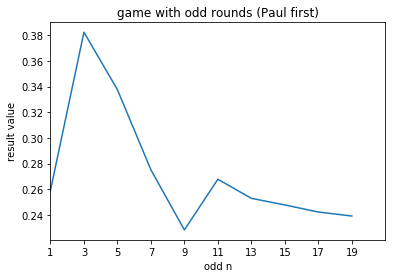

In [9]:
plt.plot(n_odd,result_odd)
plt.xlabel("odd n")
plt.ylabel("result value")
plt.title("game with odd rounds (Paul first)")
plt.xlim(1, 21)
plt.xticks(n_odd)
plt.show()

## Plot for even n, Paul plays first

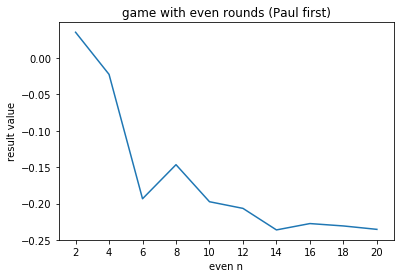

In [10]:
n_even = np.arange(2,21,2)
result_even = np.array([sum([game(i) for j in range(30)])/30 for i in n_even])
plt.plot(n_even,result_even)
plt.xlabel("even n")
plt.ylabel("result value")
plt.title("game with even rounds (Paul first)")
plt.xlim(1, 21)
plt.xticks(n_even)
plt.show()

## Put odd and even together, Paul plays first

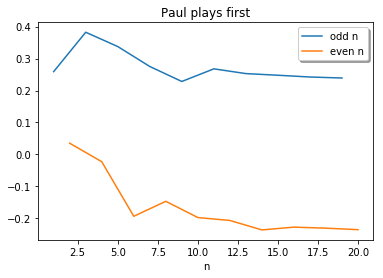

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('n') 
ax.plot(n_odd,result_odd,label="odd n")
ax.plot(n_even,result_even,label="even n")
ax.set_title('Paul plays first')
legend = ax.legend(loc="best", shadow=True)

## If Carole plays first

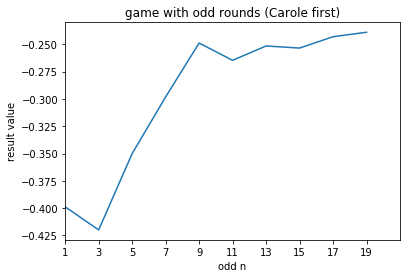

In [13]:
n_odd = np.arange(1,20,2)
result_odd = np.array([sum([game(i,1) for j in range(30)])/30 for i in n_odd])
plt.plot(n_odd,result_odd)
plt.xlabel("odd n")
plt.ylabel("result value")
plt.title("game with odd rounds (Carole first)")
plt.xlim(1, 21)
plt.xticks(n_odd)
plt.show()

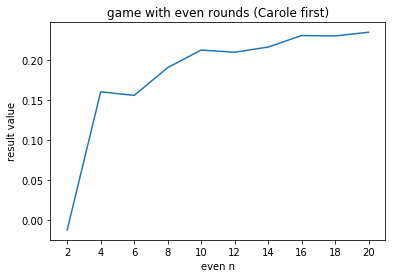

In [14]:
n_even = np.arange(2,21,2)
result_even = np.array([sum([game(i,1) for j in range(30)])/30 for i in n_even])
plt.plot(n_even,result_even)
plt.xlabel("even n")
plt.ylabel("result value")
plt.title("game with even rounds (Carole first)")
plt.xlim(1, 21)
plt.xticks(n_even)
plt.show()

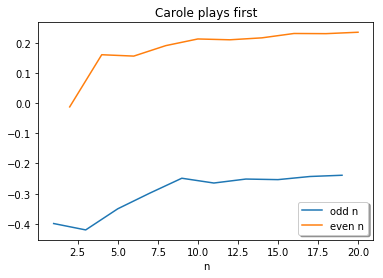

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('n') 
ax.plot(n_odd,result_odd,label="odd n")
ax.plot(n_even,result_even,label="even n")
ax.set_title('Carole plays first')
legend = ax.legend(loc="best", shadow=True)

## Varience and plot

We run the game for n = 20 for 100 times

In [16]:
result = [game(20) for j in range(100)]
        
print("variance is",np.var(result))

variance is 9.526969456810537e-05


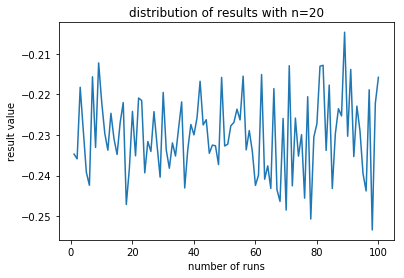

In [17]:
exp = np.arange(1,101,1)
plt.plot(exp,result)
plt.xlabel("number of runs")
plt.ylabel("result value")
plt.title("distribution of results with n=20")
plt.show()